In [183]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense,Flatten
import numpy as np
import matplotlib.pyplot as plt

In [184]:
columns=["symboling", "normalized-losses","make","fuel-type",
         "aspiration","num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base",
         "length", "width","height","curb-weight",
         "engine-type","num-of-cylinder",
         "engine-size","fuel-system","bore","stroke",
         "compression-ratio","horsepower","peak-rpm","city-mpg",
         "highway-mpg", "price"
]

In [185]:
len(columns)

26

In [186]:
df=pd.read_csv("car_prices.csv" ,names=columns)
df=df.dropna(subset=["price"])
#df=df[df["price"] != '?']
#df['price']=df['price'].astype(float)
for column in ['price','wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']:
    df=df[df[column] != '?']
    df[column]=df[column].astype(float)
print(df.head(2))
print(np.array(df['price']))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...        130.0   
1  convertible          rwd           front        88.6  ...        130.0   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0      111.0    5000.0     21.0   
1         mpfi  3.47    2.68               9.0      111.0    5000.0     21.0   

   highway-mpg    price  
0         27.0  13495.0  
1         27.0  16500.0  

[2 rows x 26 columns]
[13495. 16500. 16500. 13950. 17450. 15250. 17710. 18920. 23875. 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.
  5572.  6377.  7957.  6229.  6692.  760

In [187]:
encoder=LabelEncoder()

df["make_enc"]=encoder.fit_transform(df["make"])

#print(asarray(df["make"][0:200]))

def one_hot_encode(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)
    return df

df_final=one_hot_encode(df,["make","fuel-type","drive-wheels","engine-location",
                            "aspiration","num-of-cylinder","num-of-doors","fuel-system",
                            "body-style","engine-type"])
print(df_final)

def convert_to_numeric(df, column_list):
    for col in column_list:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df_numeric=convert_to_numeric(df_final,df_final.columns)

df_numeric.describe()

print(df_numeric['price'])

     symboling normalized-losses  wheel-base  length  width  height  \
0            3                 ?        88.6   168.8   64.1    48.8   
1            3                 ?        88.6   168.8   64.1    48.8   
2            1                 ?        94.5   171.2   65.5    52.4   
3            2               164        99.8   176.6   66.2    54.3   
4            2               164        99.4   176.6   66.4    54.3   
..         ...               ...         ...     ...    ...     ...   
200         -1                95       109.1   188.8   68.9    55.5   
201         -1                95       109.1   188.8   68.8    55.5   
202         -1                95       109.1   188.8   68.9    55.5   
203         -1                95       109.1   188.8   68.9    55.5   
204         -1                95       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  ...  fuel-system_spdi  \
0         2548.0        130.0  3.47    2.68  ...                 0   
1      

In [188]:
x_columns=[column for column in df_numeric.columns if column not in['price','symboling', 'normalized-losses']]
#x_columns=['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
print(x_columns)

X=df_numeric[x_columns]
y=np.array(df_numeric["price"])
print(y)

['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'make_enc', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear', 'aspiration_turbo', 'num-of-cylinder_five', 'num-of-cylinder_four', 'num-of-cylinder_six', 'num-of-cylinder_three', 'num-of-cylinder_twelve', 'num-of-doors_four', 'num-of-doors_two', 'fuel-system_2bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'engine-type_l', 'engine-type_ohc', 'engine-

In [189]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [195]:
print("columns",X_train.shape[1])
activation2="relu"
model = Sequential()
model.add(Dense(units=512, activation='relu', input_dim=(X_train.shape[1]),dtype="float32"))
model.add(Dense(units=512, activation='relu', input_dim=(X_train.shape[1]),dtype="float32"))
model.add(Dense(units=256, activation=activation2))
model.add(Dense(units=256, activation=activation2))
model.add(Dense(units=128, activation=activation2))
model.add(Dense(units=1,activation='linear'))

optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='mean_absolute_error',metrics=['accuracy'])

columns 60


In [196]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 512)               31232     
                                                                 
 dense_103 (Dense)           (None, 512)               262656    
                                                                 
 dense_104 (Dense)           (None, 256)               131328    
                                                                 
 dense_105 (Dense)           (None, 256)               65792     
                                                                 
 dense_106 (Dense)           (None, 128)               32896     
                                                                 
 dense_107 (Dense)           (None, 1)                 129       
                                                                 
Total params: 524,033
Trainable params: 524,033
Non-t

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=2000, batch_size=1024,
                    validation_data=(X_test, y_test), 
                    verbose=1)

Epoch 1/2000
1/1 [==============================] - 0s 92ms/step - loss: 2151.1692 - accuracy: 0.0000e+00 - val_loss: 2843.2737 - val_accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 74ms/step - loss: 2172.7629 - accuracy: 0.0000e+00 - val_loss: 2726.4849 - val_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 42ms/step - loss: 2150.6592 - accuracy: 0.0000e+00 - val_loss: 2731.3186 - val_accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 75ms/step - loss: 2187.3096 - accuracy: 0.0000e+00 - val_loss: 2754.0161 - val_accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 64ms/step - loss: 2141.5786 - accuracy: 0.0000e+00 - val_loss: 2878.4507 - val_accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 46ms/step - loss: 2203.7456 - accuracy: 0.0000e+00 - val_loss: 2747.3103 - val_accuracy: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 74ms/step - los

1/1 [==============================] - 0s 66ms/step - loss: 2099.1985 - accuracy: 0.0000e+00 - val_loss: 2648.7854 - val_accuracy: 0.0000e+00
Epoch 54/2000
1/1 [==============================] - 0s 62ms/step - loss: 2079.3914 - accuracy: 0.0000e+00 - val_loss: 2649.5007 - val_accuracy: 0.0000e+00
Epoch 55/2000
1/1 [==============================] - 0s 53ms/step - loss: 2095.6277 - accuracy: 0.0000e+00 - val_loss: 2701.6165 - val_accuracy: 0.0000e+00
Epoch 56/2000
1/1 [==============================] - 0s 60ms/step - loss: 2084.8838 - accuracy: 0.0000e+00 - val_loss: 2701.8264 - val_accuracy: 0.0000e+00
Epoch 57/2000
1/1 [==============================] - 0s 48ms/step - loss: 2081.6526 - accuracy: 0.0000e+00 - val_loss: 2642.9495 - val_accuracy: 0.0000e+00
Epoch 58/2000
1/1 [==============================] - 0s 59ms/step - loss: 2077.6443 - accuracy: 0.0000e+00 - val_loss: 2644.1704 - val_accuracy: 0.0000e+00
Epoch 59/2000
1/1 [==============================] - 0s 41ms/step - loss: 2069

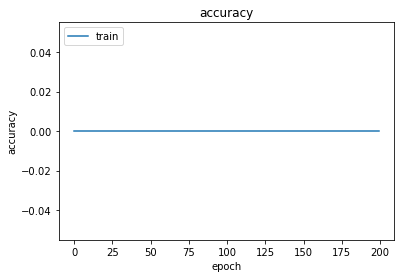

In [198]:
def plotHistory(history):
        plt.plot(history.history['accuracy'])
        plt.title('accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
        
plotHistory(history)